load dataset Metastatic castration-sensitive prostate cancer (MSK, Clin Cancer Res 2020)


In [1]:
pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.4/484.4 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 15.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 20.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.5/17.5 MB 62.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 71.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 69.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 85.6 MB/s eta 0:

In [4]:
import pandas as pd

In [5]:
from pycaret.classification import *
data1 = pd.read_csv('/content/new_data.csv')

In [6]:
s = setup(data1 ,target = "Castration Resistance Event"  ,use_gpu=True,remove_outliers = True  , session_id = 71 , train_size = 0.8, ordinal_features = {'Disease volume' : ['Low-volume disease', 'High-volume disease']})

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset migh

,Description,Value
0,Session id,71
1,Target,Castration Resistance Event
2,Target type,Binary
3,Target mapping,"No: 0, Yes: 1"
4,Original data shape,"(424, 31)"
5,Transformed data shape,"(407, 45)"
6,Transformed train set shape,"(322, 45)"
7,Transformed test set shape,"(85, 45)"
8,Ordinal features,5
9,Numeric features,12


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset migh

In [7]:
best = compare_models(n_select = 5,sort = 'Accuracy')


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.7374,0.8093,0.8058,0.7529,0.7738,0.4584,0.4682,1.7300
lightgbm,Light Gradient Boosting Machine,0.7374,0.7900,0.7692,0.7686,0.7651,0.4656,0.4709,1.1960
gbc,Gradient Boosting Classifier,0.7348,0.7888,0.7853,0.7574,0.7660,0.4571,0.4662,1.4210
et,Extra Trees Classifier,0.6935,0.7684,0.7587,0.7277,0.7348,0.3667,0.3795,1.5510
lda,Linear Discriminant Analysis,0.6902,0.7537,0.7024,0.7387,0.7164,0.3730,0.3775,1.1900
ada,Ada Boost Classifier,0.6844,0.7426,0.7384,0.7157,0.7227,0.3533,0.3581,1.2730
ridge,Ridge Classifier,0.6755,0.0000,0.6811,0.7308,0.7001,0.3442,0.3499,0.8270
dt,Decision Tree Classifier,0.6609,0.6538,0.7018,0.6973,0.6953,0.3101,0.3148,0.8820
nb,Naive Bayes,0.6283,0.7210,0.4658,0.7844,0.5665,0.2894,0.3256,1.0550
qda,Quadratic Discriminant Analysis,0.5900,0.7300,0.5537,0.7473,0.5561,0.1816,0.2326,0.8480


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [8]:
tuned = tune_model(best[0], optimize = 'Accuracy',fold=5,choose_better= True  ,n_iter=20,)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8235,0.8665,0.9231,0.8000,0.8571,0.6294,0.6405
1,0.6471,0.7065,0.7436,0.6744,0.7073,0.2655,0.2675
2,0.7206,0.7868,0.6579,0.8065,0.7246,0.4469,0.4565
3,0.6765,0.7325,0.6316,0.7500,0.6857,0.3574,0.3630
4,0.8209,0.8757,0.8684,0.8250,0.8462,0.6322,0.6334
Mean,0.7377,0.7936,0.7649,0.7712,0.7642,0.4663,0.4722
Std,0.0729,0.0685,0.1144,0.0544,0.0725,0.1461,0.1472


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 20 candidates, totalling 100 fits


we can plot like anything with this func

In [16]:
evaluate_model(tuned)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [14]:
final_lr = finalize_model(tuned)

In [13]:
holdout_pred = predict_model(tuned)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.7529,0.7855,0.7292,0.8140,0.7692,0.5051,0.5087


In [20]:
holdout_pred.to_csv('predict.csv', index=False)

❗Certain features may introduce bias and lead the model to mistakenly evaluate them. Therefore, to mitigate this concern, we initially remove these features.

In [17]:
features_to_ignore = ['Study ID', 'Patient ID','Sample ID','Somatic Status',
    'patient_cohort',
    'sample_origin',
    'stage',
    'benign_sample_diagnosis',
    'Archer Panel'
    'MSK Slide ID',
    'Oncotree Code',
    '12-245 Part A Consented',
    '12-245 Part C Consented',
    'MSK Pathology Slide Available',
    'Pediatric Case Indicator',
    'Sample Class',
    'Number of Samples Per Patient',
    'Sample coverage',
    'Somatic Status',
    'SO comments',
    'MSI Comment',
    'MSK Slide ID',

]

In [18]:
exp_name = setup(data1 ,target = "Castration Resistance Event" ,fold=6,ignore_features=features_to_ignore ,use_gpu=True,remove_outliers = True  , session_id = 71 , train_size = 0.8, ordinal_features = {'Disease volume' : ['Low-volume disease', 'High-volume disease']})
rf = create_model('rf')


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset migh

,Description,Value
0,Session id,71
1,Target,Castration Resistance Event
2,Target type,Binary
3,Target mapping,"No: 0, Yes: 1"
4,Original data shape,"(424, 31)"
5,Transformed data shape,"(407, 32)"
6,Transformed train set shape,"(322, 32)"
7,Transformed test set shape,"(85, 32)"
8,Ignore features,21
9,Ordinal features,5


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset migh

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7018,0.8294,0.8125,0.7027,0.7536,0.3808,0.3873
1,0.6842,0.7075,0.8750,0.6667,0.7568,0.3294,0.3550
2,0.7018,0.7825,0.7188,0.7419,0.7302,0.3970,0.3973
3,0.7500,0.7995,0.7500,0.8000,0.7742,0.4948,0.4961
4,0.7679,0.8418,0.8125,0.7879,0.8000,0.5236,0.5239
5,0.7679,0.8535,0.8438,0.7714,0.8060,0.5185,0.5217
Mean,0.7289,0.8024,0.8021,0.7451,0.7701,0.4407,0.4469
Std,0.0340,0.0488,0.0531,0.0474,0.0266,0.0750,0.0688


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

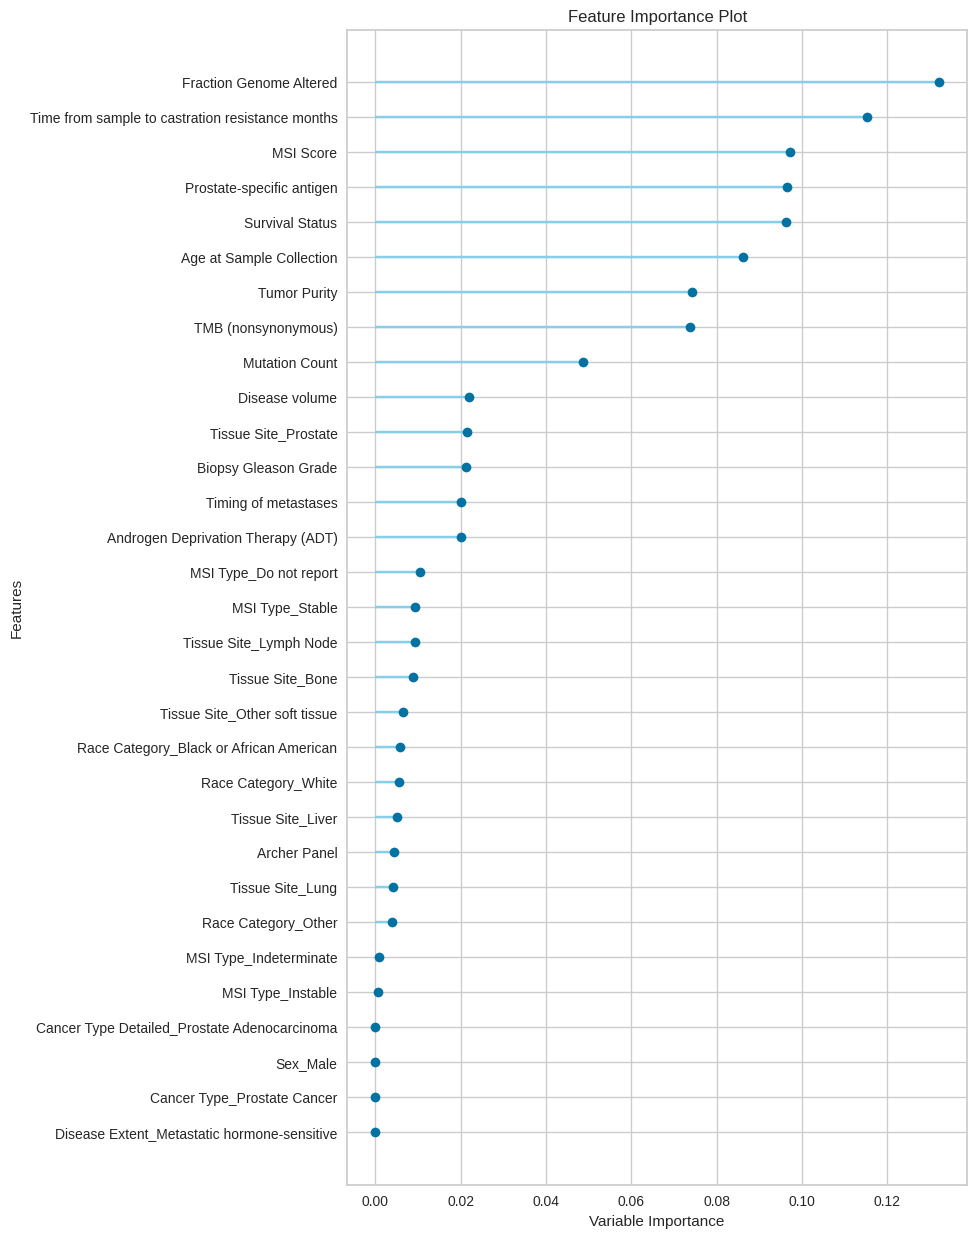

In [19]:
plot_model(rf, plot = 'feature_all')
